# plot function tests

In [1]:
__author__    = 'Steve Nicholes'
__copyright__ = 'Copyright (C) 2017 Steve Nicholes'
__license__   = 'GPL v3'
__version__   = '0.3.0'

In [2]:
# Imports
%load_ext autoreload
%autoreload 2
import sys
sys.path = [r'C:\GitHub\fivecentplots'] + sys.path
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
%matplotlib inline
#import matplotlib.pyplot as mpl

osjoin = os.path.join
st = pdb.set_trace
fcp

<module 'fivecentplots' from 'C:\\GitHub\\fivecentplots\\fivecentplots\\__init__.py'>

In [3]:
SHOW = False

# Read sample data

In [4]:
df = pd.read_csv(r'C:\GitHub\fivecentplots\fivecentplots\tests\fake_data.csv')

# Theme

In [5]:
#fcp.set_theme('white')
#fcp.set_theme('gray')

# XY Plots

## Scatter

## With legend

Wall time: 1.55 s


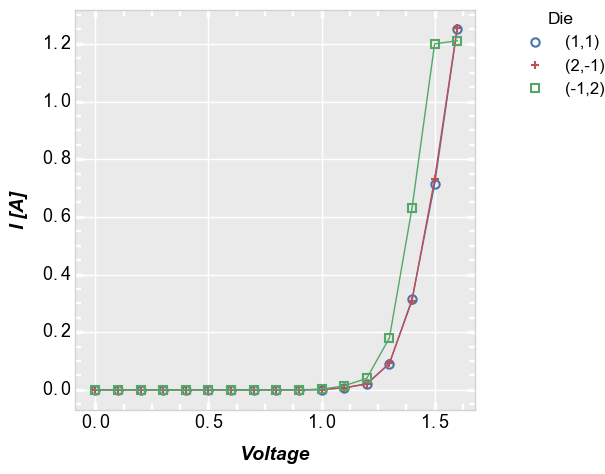

In [6]:
# Simple IV curves legended by die location
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', inline=True, show=SHOW)

## With title, no lines, and no legend

Wall time: 1.06 s


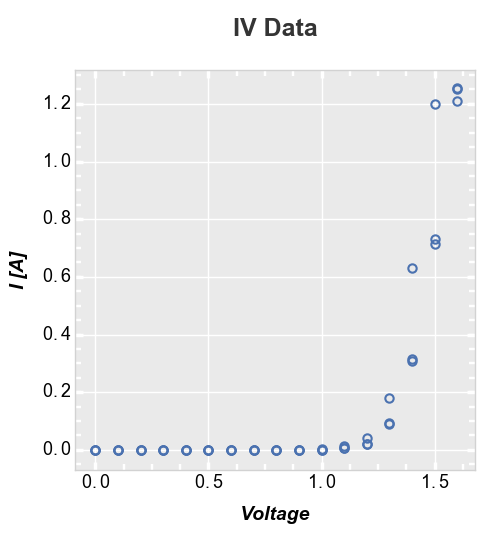

In [7]:
# Same data as above but with plot title, no legend, and no lines connecting the data points
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
%time fcp.plot(df=sub, x='Voltage', y='I [A]', inline=True, title='IV Data', lines=False, show=SHOW)

## Label formatting

Wall time: 1.25 s


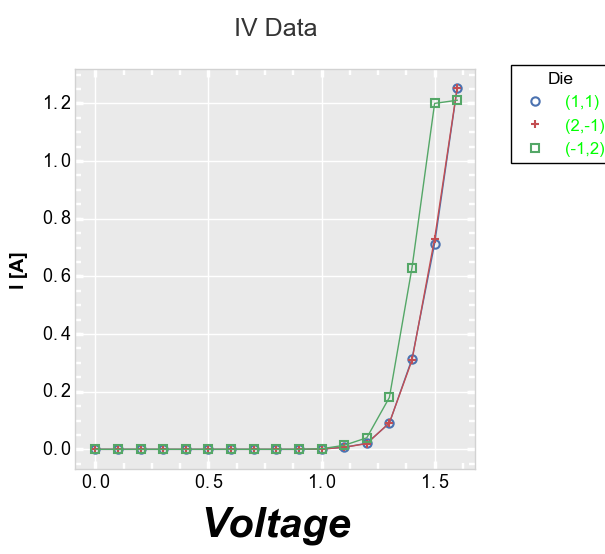

In [166]:
# Simple IV curves legended by die location but with custom label formatting
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', inline=True, title='IV Data', \
               label_x_font_size=30, label_y_font_style='normal', legend_font_color='#00FF00', \
               title_font_weight='normal', show=True, legend_edge_color='k')

## Log scale

### Log x only

Wall time: 1.38 s


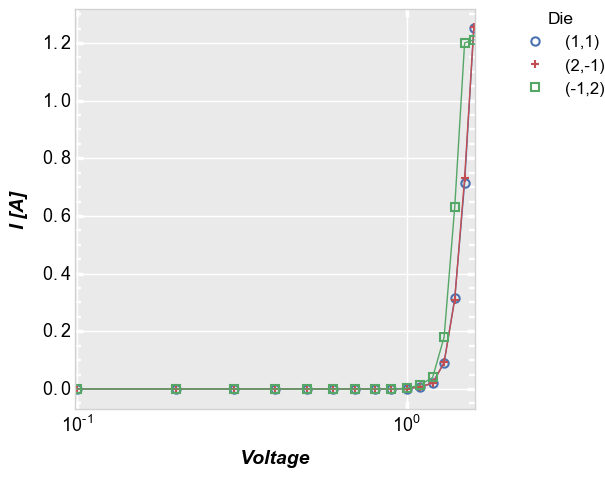

In [9]:
# Use ax_scale parameter = logx or semilogx
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
%time fcp.plot(df=sub, x='Voltage', y='I [A]', ax_scale='logx', legend='Die', inline=True, show=SHOW)

### Log log

In [26]:
# Use ax_scale parameter = loglog
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
%time fcp.plot(df=sub, x='Voltage', y='I [A]', ax_scale='symlog', legend='Die', inline=True, show=SHOW, xmin=0.9)

AttributeError: 'float' object has no attribute 'base'

# Secondary x|y plots

## Shared x axis (twinx)

bah: axes[ia].get_xaxis().get_major_formatter().set_scientific(False)
Wall time: 1.31 s


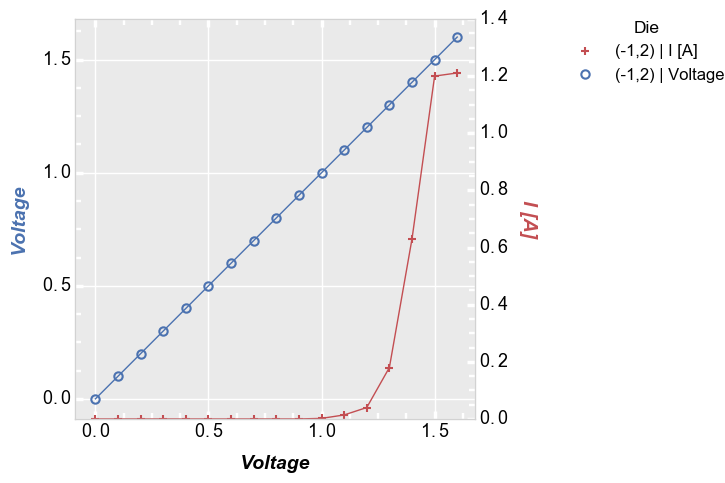

In [11]:
# Simple IV curves for one die and 
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy() &
         (df['Die']=="(-1,2)")
        ]
%time fcp.plot(df=sub, x='Voltage', y=['Voltage', 'I [A]'], legend='Die', inline=True, twinx=True, show=SHOW)

## Shared y axis (twiny)

bah2: axes[ia].get_xaxis().get_major_formatter().set_scientific(False)
Wall time: 1.35 s


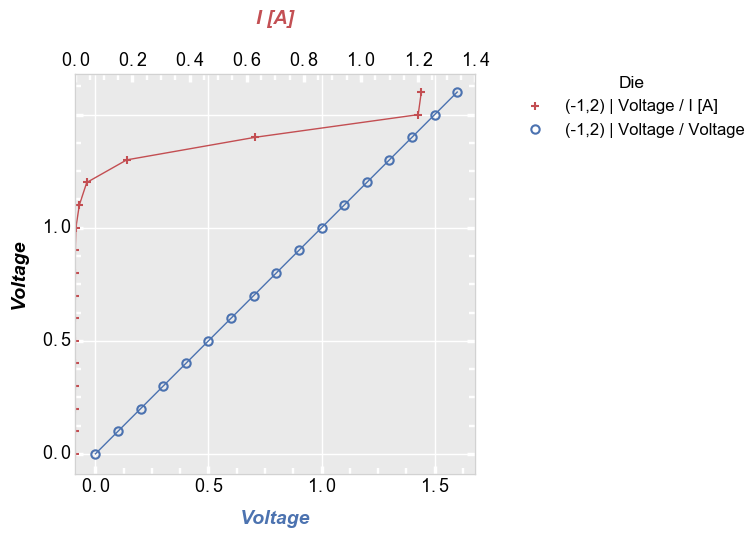

In [12]:
# Simple IV curves for one die and 
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy() &
         (df['Die']=="(-1,2)")
        ]
%time fcp.plot(df=sub, x=['Voltage', 'I [A]'], y='Voltage', legend='Die', inline=True, twiny=True, show=SHOW)
# ticks_minor not working?

# Multiple x & y values

## Multiple y only

Wall time: 1.09 s


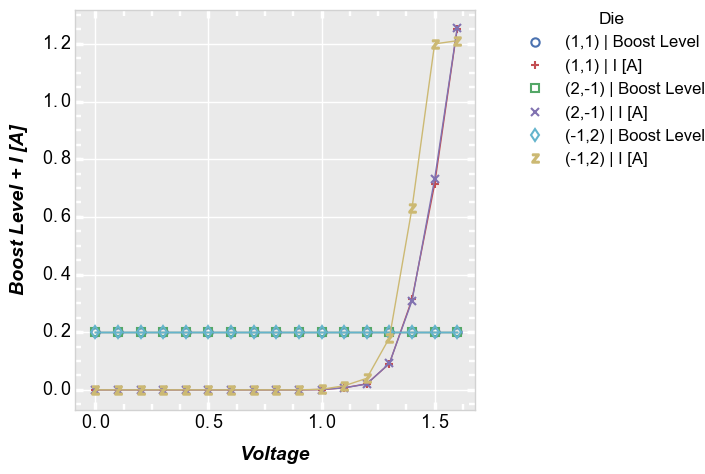

In [13]:
# Remove the twinx argument
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
%time fcp.plot(df=sub, x='Voltage', y=['Boost Level', 'I [A]'], legend='Die', inline=True, show=SHOW)

## Multiple x only

Wall time: 1.16 s


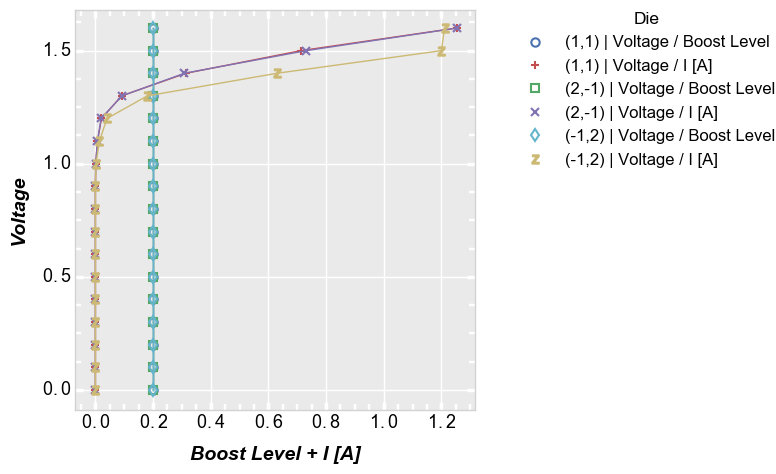

In [14]:
# Remove the twiny argument
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
%time fcp.plot(df=sub, x=['Boost Level', 'I [A]'], y='Voltage', legend='Die', inline=True, show=SHOW)

## Both

Wall time: 1.55 s


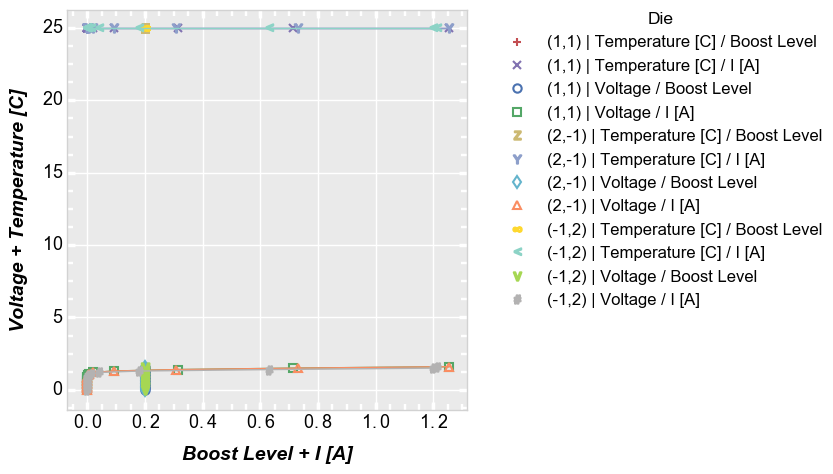

In [15]:
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
%time fcp.plot(df=sub, x=['Boost Level', 'I [A]'], y=['Voltage', 'Temperature [C]'], legend='Die', inline=True, show=SHOW)

# Grid Plots

## Row plot

Create a unique plot for each unique value of the "row" column in the specified DataFrame.  Plots are arranged row by row in a single column.  Each row contains a label indicating the unique value of the "row" column.

Wall time: 1.45 s


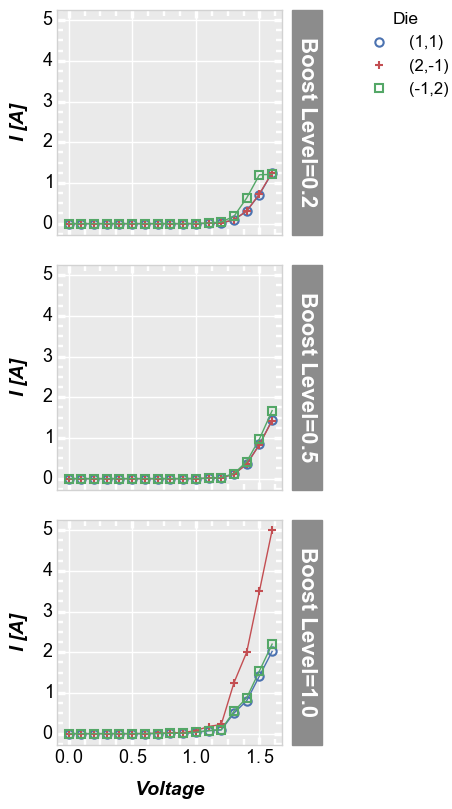

In [33]:
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450) & (df['Temperature [C]']==25)].copy()
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', row='Boost Level', \
               inline=True, show=False, ax_size=[225, 225])

## Column plot

Create a unique plot for each unique value of the "col" column in the specified DataFrame.  Plots are arranged in a single row, column by column.  Each column contains a label indicating the unique value of the "col" column.

Wall time: 1.48 s


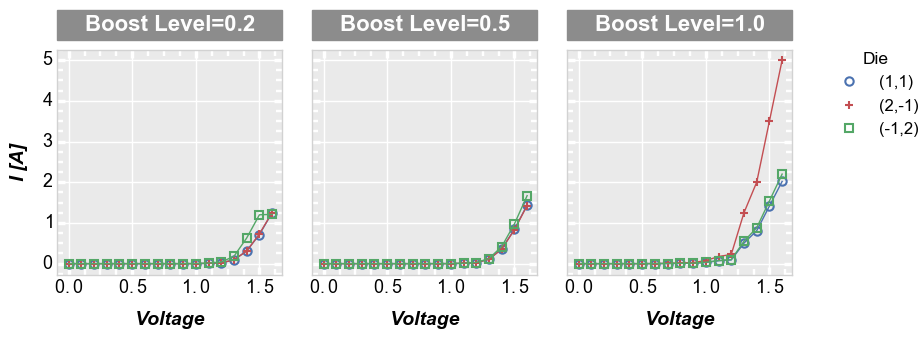

In [34]:
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450) & (df['Temperature [C]']==25)].copy()
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', col='Boost Level', \
               inline=True, show=False, ax_size=[225, 225])

## Row x column grid

Remove "Temperature [C]" from the DataFrame subset and make a grid of plots for each unique combination of "row" and "col" values.  Both "row" and "col" labels are included.

Wall time: 3.29 s


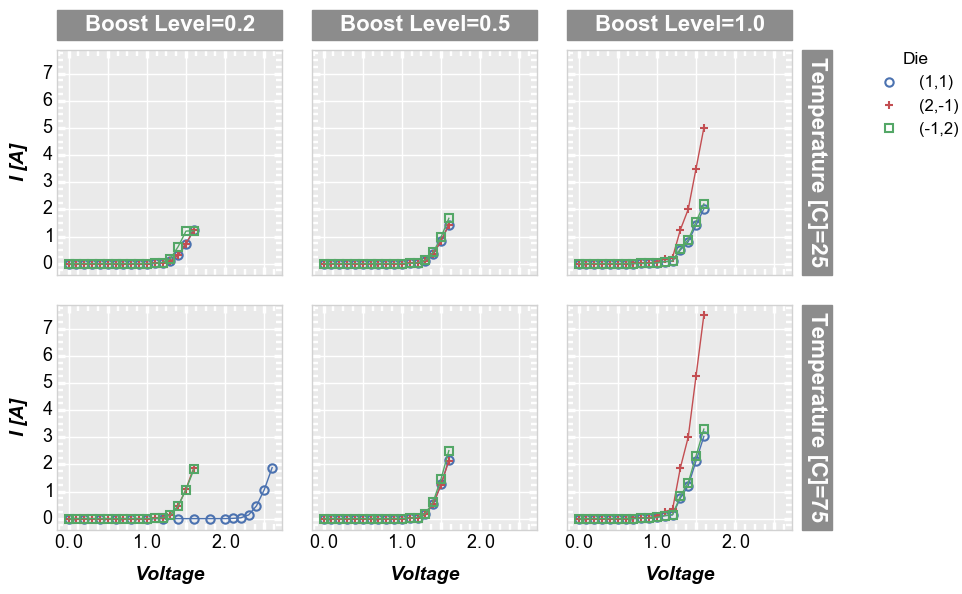

In [170]:
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450)].copy()
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', \
               inline=True, show=SHOW, ax_size=[225, 225])

## Wrap plot

A wrap plot is an alternate view of the row x column plot.  For wrap plots, the row and column labels are condensed into a  single label above each plot window and the spacing between plots is eliminated (by default; can be overriden).  The x and y sizes of the grid are determined by the square root of the total number of plot windows.  x and y axes ranges are shared.

Wall time: 4.08 s


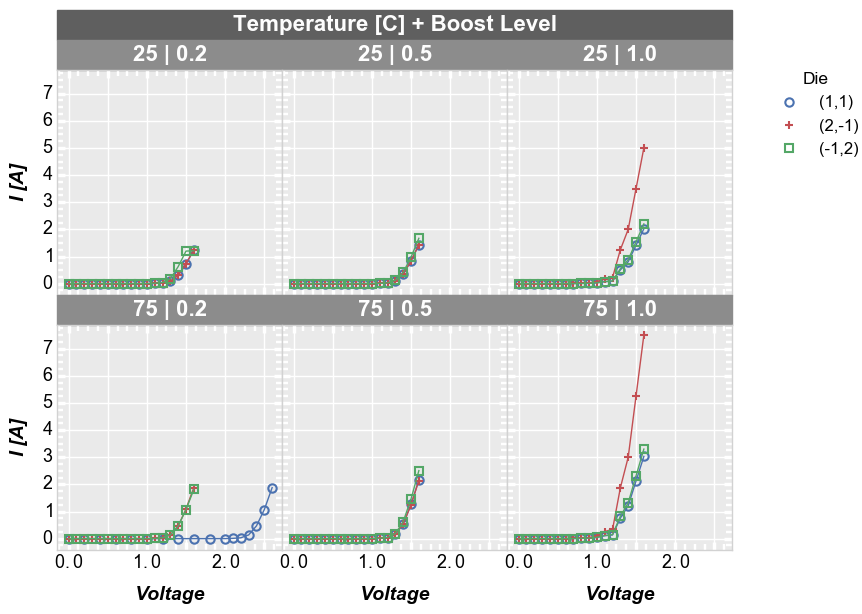

In [165]:
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450)].copy()
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', wrap=['Temperature [C]', 'Boost Level'], \
               inline=True, show=SHOW, ax_size=[225, 225])

## Axes Sharing

In grid plots, the data range of each plot window can be scaled independently or matched to other plot windows.

### Shared axes ranges (default)

By default, grid plots share axes and tick labels and x and y data ranges.

Wall time: 3.39 s


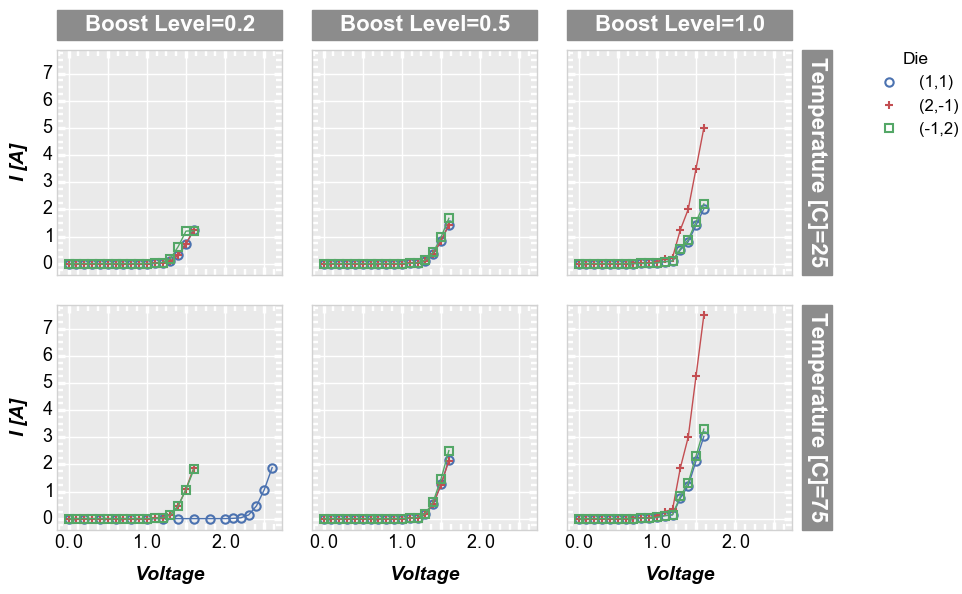

In [24]:
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450)].copy()
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', \
               inline=True, show=False, ax_size=[225, 225])

### Separate labels

Wall time: 2.93 s


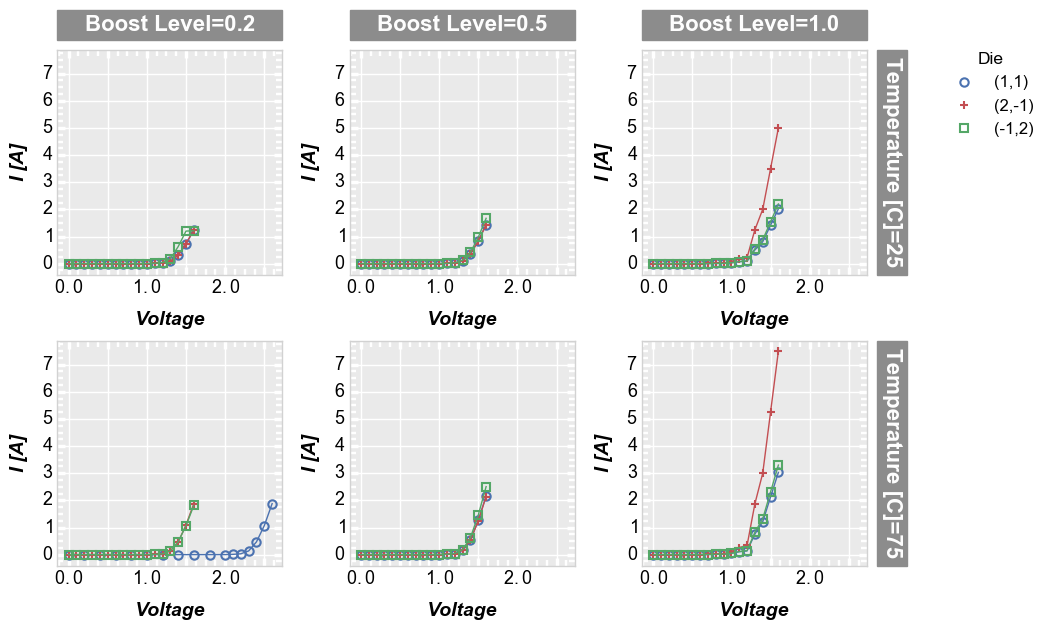

In [171]:
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450)].copy()
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', \
               inline=True, show=SHOW, ax_size=[225, 225], separate_labels=True)

### Single axis range sharing only

Wall time: 3.33 s


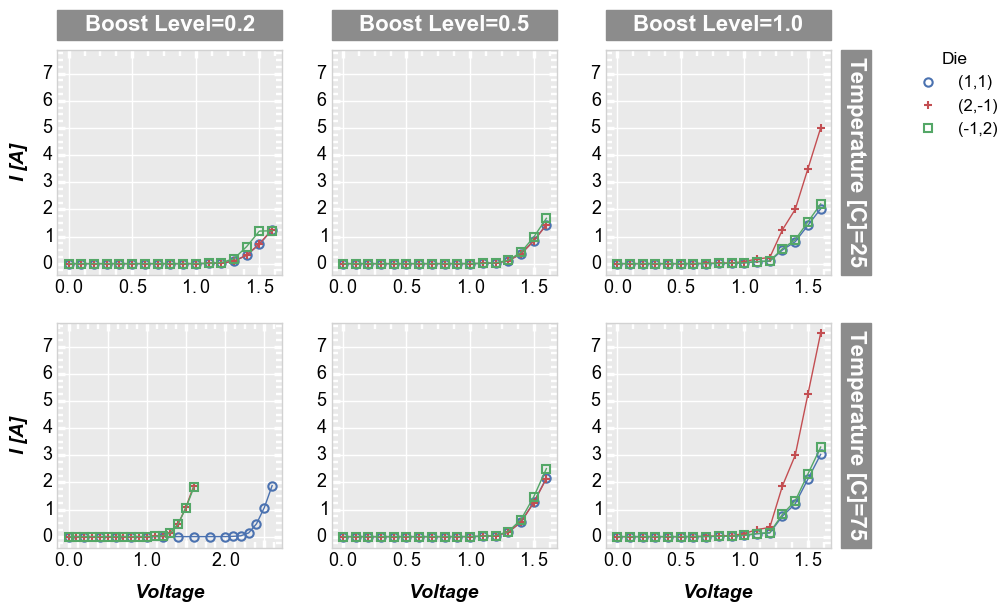

In [23]:
# Same data as above but only share the y axis range and allow the x axis range to scale independently for each plot
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450)].copy()
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', \
               share_x=False, inline=True, show=True, ax_size=[225, 225])

### No shared ranges

Wall time: 3.46 s


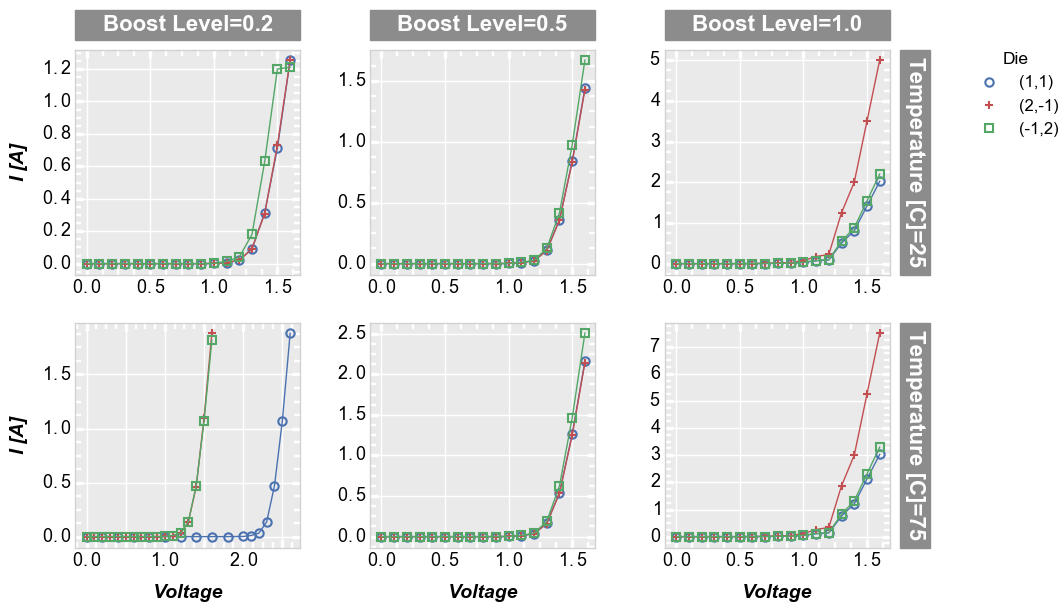

In [26]:
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450)].copy()
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', \
               share_x=False, share_y=False, inline=True, show=True, ax_size=[225, 225])

### Shared row axes ranges

Wall time: 5.47 s


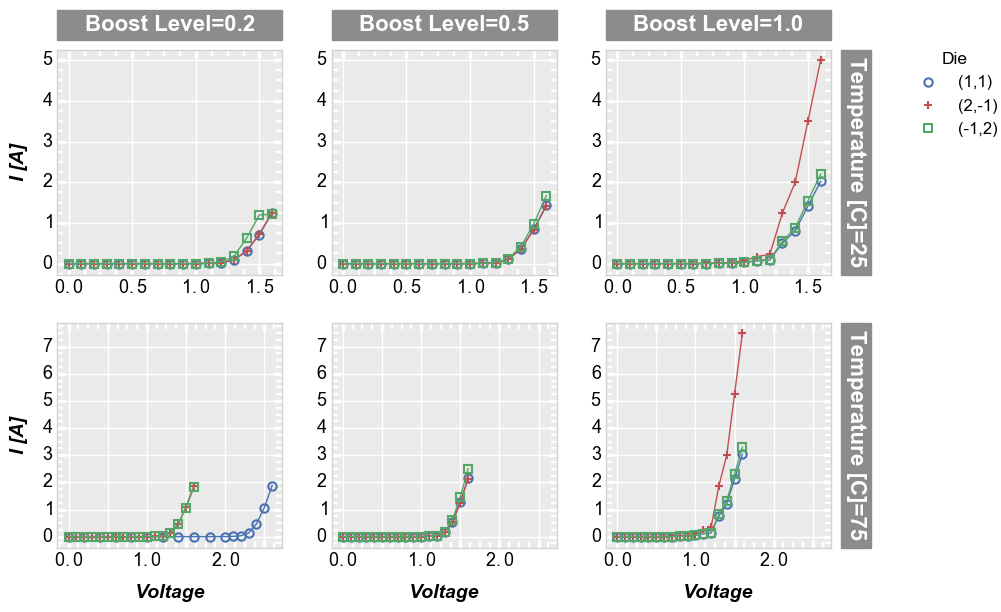

In [31]:
# Can also share axes ranges by row or column
sub = df[(df.Substrate=='Si') & (df['Target Wavelength']==450)].copy()
%time fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', \
               share_row=True, inline=True, show=True, ax_size=[225, 225])

# Filtering

In [ ]:
filt = 'Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25'
fcp.plot(df=df, x='Voltage', y=['I [A]', 'Voltage'], filter=filt, leg_groups='Die', ylabel='Values', 
         inline=True, show=SHOW)

# Stats

In [ ]:
filt = 'Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25'
fcp.plot(df=df, x='Voltage', y='I [A]', filter=filt, leg_groups='Die', ylabel='Values', inline=True, 
         conf_int='range', show=SHOW)

In [ ]:
filt = 'Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25'
fcp.plot(df=df, x='Voltage', y='I [A]', filter=filt, leg_groups='Die', ylabel='Values', inline=True, 
         conf_int=0.99, show=SHOW)

OTHER CRAP
* transformations
* confidence intervals
* styles